<a href="https://colab.research.google.com/github/HovhannesArustamyan/KNN_algorithm_using_PCA/blob/master/classification_with_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [401]:
dataset= load_wine()

In [402]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [403]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [404]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df.isnull().sum()

In [406]:
X = dataset.data
y= dataset.target
X.shape

(178, 13)

In [407]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

***Using StandardScaler for TRAIN data***

In [408]:
scaler= StandardScaler()

In [409]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled

array([[ 2.26327625e-01, -2.45185855e-02,  1.10112749e+00, ...,
         3.01960239e-01,  7.70065176e-01,  1.44583084e+00],
       [-1.07980737e+00, -2.80281086e-01, -2.36874201e+00, ...,
         1.32908842e+00,  4.81290735e-01, -1.07920216e-01],
       [-6.68616724e-01,  1.86629704e+00,  1.31575859e+00, ...,
        -1.68806843e-01,  7.01309357e-01, -1.23643414e+00],
       ...,
       [ 1.70177642e+00, -4.72102961e-01,  6.37438239e-02, ...,
         1.02950937e+00,  5.36295390e-01,  2.62995270e+00],
       [-3.42082975e-01, -7.82671711e-01, -3.65518382e-01, ...,
         2.38118688e-03, -7.56314012e-01, -8.11197011e-01],
       [-7.65367464e-01,  5.76907895e-02,  3.49918628e-01, ...,
        -6.82370932e-01,  1.05883962e+00, -9.97647138e-01]])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

***Using PCA for TRAIN data***

In [411]:
pca = PCA(n_components=3)

In [412]:
fit=pca.fit(X_train_scaled)
fit

PCA(n_components=3)

In [413]:
X_train_pca = fit.transform(X_train_scaled)

In [415]:
X_train_pca.shape

(133, 3)

***Using Matplotlib***

In [416]:
from mpl_toolkits.mplot3d import Axes3D

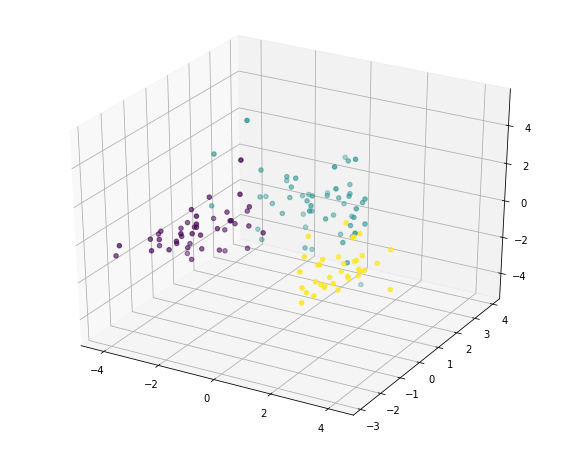

In [420]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train_pca[:,0],X_train_pca[:,1],X_train_pca[:,2] , c=y_train )

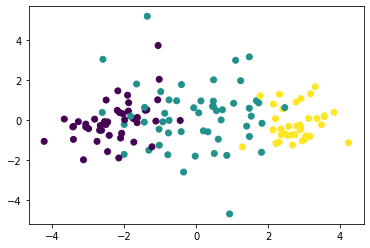

In [421]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,2] , c=y_train)
plt.show()

***Transforming TEST data***

In [422]:
X_test_pca = pca.transform(X_test_scaled)

In [424]:
X_test_pca.shape

(45, 3)

***Using CrossValidation on KNN classifier***

In [495]:
from sklearn.neighbors import KNeighborsClassifier

In [496]:
knn=KNeighborsClassifier()

In [507]:
k_range = list(range(1,9))
param_grid=dict(n_neighbors=k_range)
param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]}

In [508]:
grid = GridSearchCV(knn,param_grid,cv=5)
grid.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [511]:
result_data=pd.DataFrame(grid.cv_results_)
result_data[['mean_test_score']]

,mean_test_score
0,0.924786
1,0.917379
2,0.947293
3,0.939886
4,0.962678
5,0.955271
6,0.955271
7,0.955271


In [512]:
grid.best_index_

4

In [514]:
grid.best_params_

{'n_neighbors': 5}

In [516]:
clf = KNeighborsClassifier(n_neighbors=5)
model = clf.fit(X_train_pca,y_train)

In [534]:
y_pred_tr=model.predict(X_train_pca)
y_pred=model.predict(X_test_pca)

In [549]:
print('Train score', accuracy_score(y_train,y_pred_tr))
print('Test score', accuracy_score(y_test,y_pred))


Train score 0.9699248120300752
Test score 0.9777777777777777


***Ploting ConfusionMatrix***

In [556]:
conf_matrix = confusion_matrix
confusion_matrix

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]])

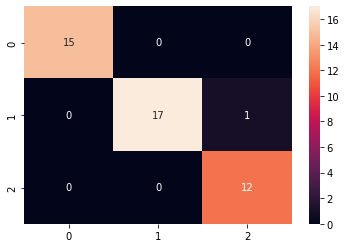

In [557]:

sns.heatmap(conf_matrix, annot=True)